In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy import optimize
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace import tools 

In [2]:
ar_params = np.array([0.2,0.15,0.1])
ma_params = np.array([0.4,0.2,0.1])

ar = np.r_[1,-ar_params]
ma = np.r_[1,ma_params]

np.random.seed(99)
X_ = ArmaProcess(ar,ma).generate_sample(nsample=1500)

X = np.cumsum(X_)

In [4]:
def plot_series(X, title='Time Series Plot', y_label='Value of X'):
    """ Plots the time series data X.

    Args:
        X (np.array) - Time-series data
        title (str) - Title for the figure
        y_label (str) - y-label for the figure
    """
    fig = plt.figure(figsize=(16, 5))
    plt.plot(X, linewidth=3)
    plt.title(title, fontsize=15)
    plt.xlabel('Time', fontsize=13)
    plt.ylabel(y_label, fontsize=13)
    plt.grid()
    plt.show()

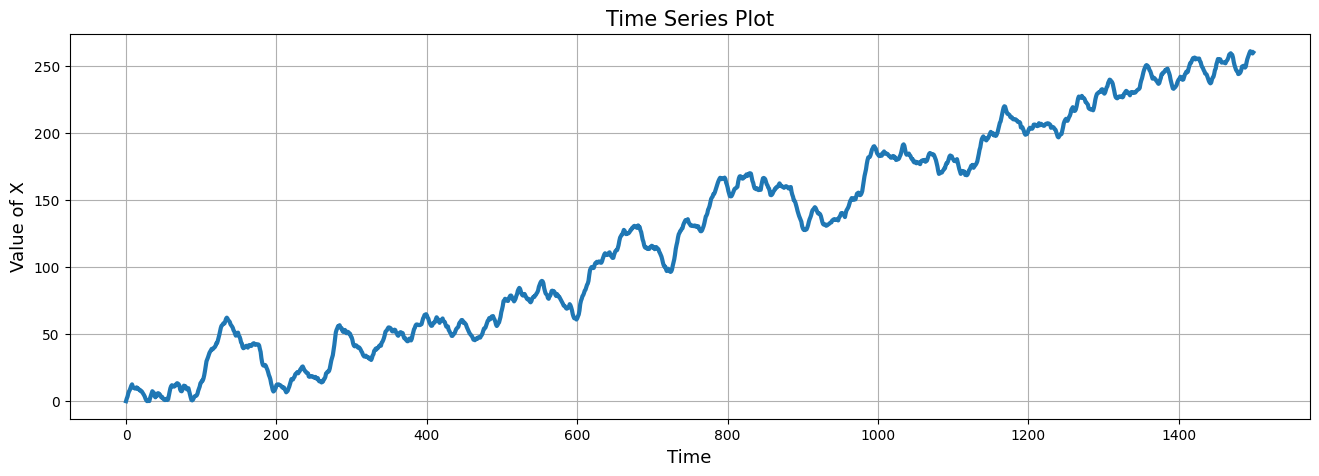

In [7]:
plot_series(X)

In [8]:
p_threshold = 0.05

order_d = 0
X_diff = X.copy()

# loop to get stationary data 
while stattools.adfuller(X_diff)[1] > p_threshold:
    order_d += 1
    X_diff = tools.diff(X_diff)

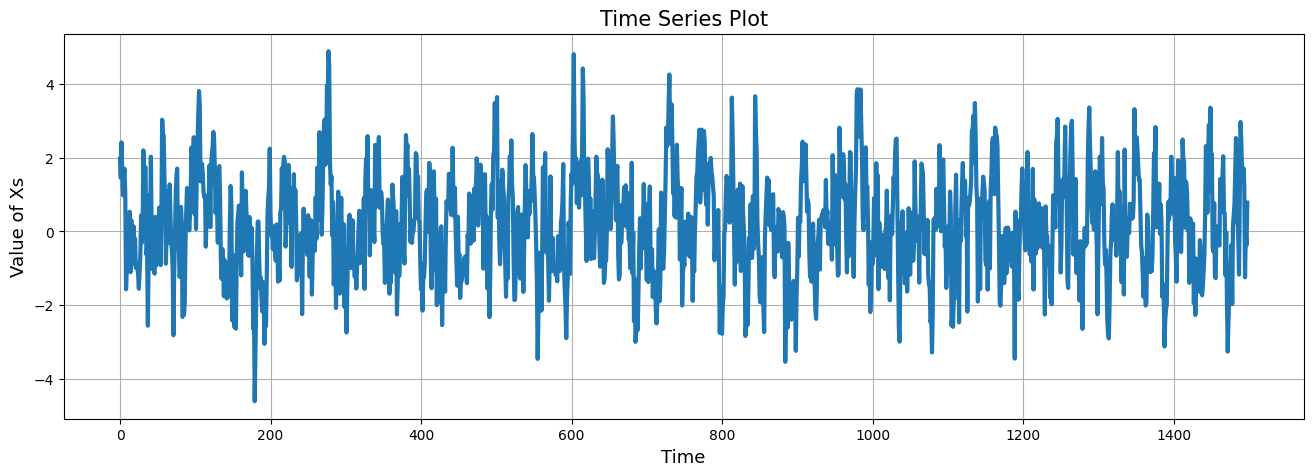

In [10]:
X_stationary = X_diff
d = order_d
plot_series(X_stationary, y_label='Value of Xs')

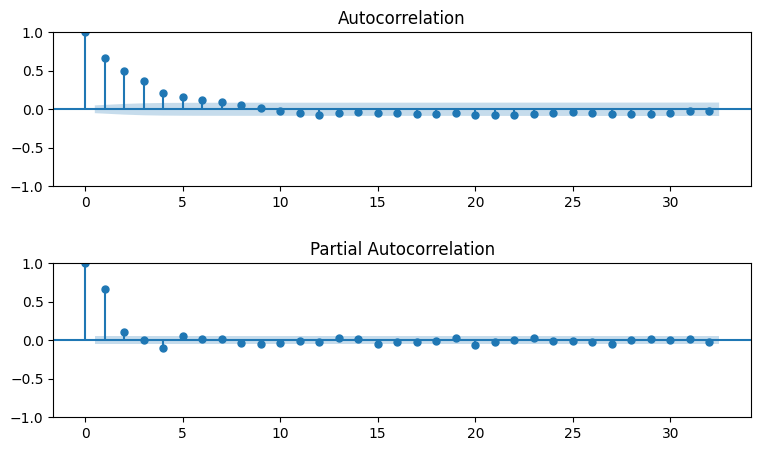

In [12]:
def plot_graphs(X=None):
    """ Plot the PACF and ACF graphs for the time series data X

    Args:
        X (np.array): Time-series data
    """
    fig = plt.figure(figsize=(9, 5))
    fig.subplots_adjust(hspace=0.5)

    # ACF plot
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(X, ax=ax1)

    # PACF plot
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(X, ax=ax2)
    plt.show()

plot_graphs(X=X_stationary)

In [13]:
p_ = 5
q_ = 6

In [14]:
# minimization function
def f(order, X):
    """ Minimization function
        
        It generates a ARIMA model with provided orders and fits on the time series.
        
    Args:
        order ((int, int, int, int)): Tuple of (p, q, P, Q)
        X (np.array): Time-series data
        
    Returns:
        (float or np.inf): BIC score for the model and np.inf in case of any exception
        
    """
    p, q = order
    try:
        model = sm.tsa.ARIMA(X, order=(p, d, q)).fit()
    except ValueError:
        return np.inf
    return model.bic

# order ranges
ar_orders = slice(1, p_ + 1, 1)
ma_orders = slice(1, q_ + 1, 1)
order_ranges = (ar_orders, ma_orders)

# brute force serach
min_order = optimize.brute(f, order_ranges, args=(X,), finish=None)
min_order = min_order.astype(int)
min_order

/home/aayush/anaconda3/envs/open_ai/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/aayush/anaconda3/envs/open_ai/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/aayush/anaconda3/envs/open_ai/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/aayush/anaconda3/envs/open_ai/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA 

array([1, 3])

In [16]:
p, q = min_order

[]

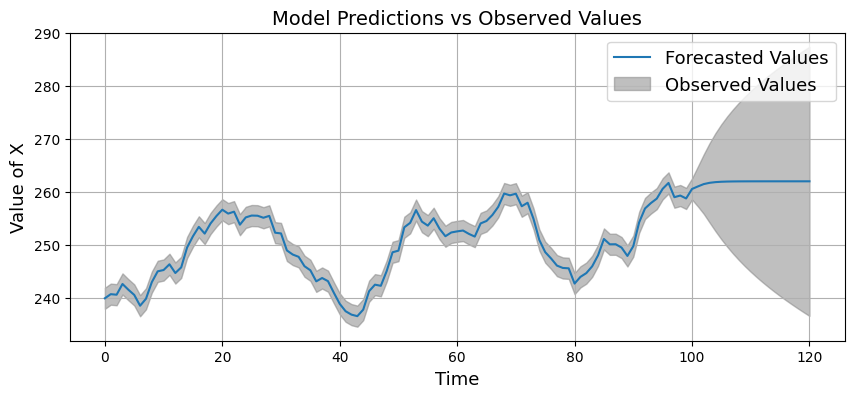

In [24]:
from statsmodels.graphics.tsaplots import plot_predict
model = sm.tsa.ARIMA(X, order=(p, d, q)).fit()

ax = plt.figure(figsize=(10, 4)).add_subplot(111)
# model.plot_predict(len(X) - 100, len(X) + 20,
#                    dynamic=False, ax=ax, plot_insample=True)

plot_predict(model,len(X) - 100, len(X) + 20,
                   dynamic=False, ax=ax, plot_insample=True)
plt.title('Model Predictions vs Observed Values', fontsize=14)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Value of X', fontsize=13)
plt.legend(
    ['Forecasted Values', 'Observed Values', '95% confidence inteval'],
    fontsize=13
)
plt.grid()
plt.plot()